In [14]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# 2 Layer model

In [119]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [121]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y


In [122]:
X,Y = load_planar_dataset()

In [24]:
def layer_sizes(X, Y,n_h):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    
    return (n_x, n_h, n_y)

In [34]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

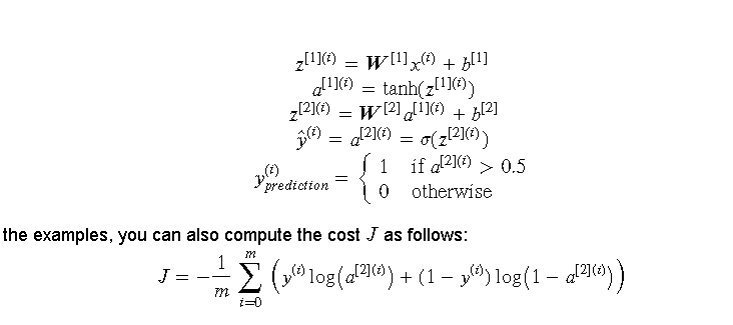

In [17]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"] 
    b1 = parameters["b1"] 
    W2 = parameters["W2"] 
    b2 = parameters["b2"]  
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [18]:
def compute_cost(A2, Y):
    
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)/m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

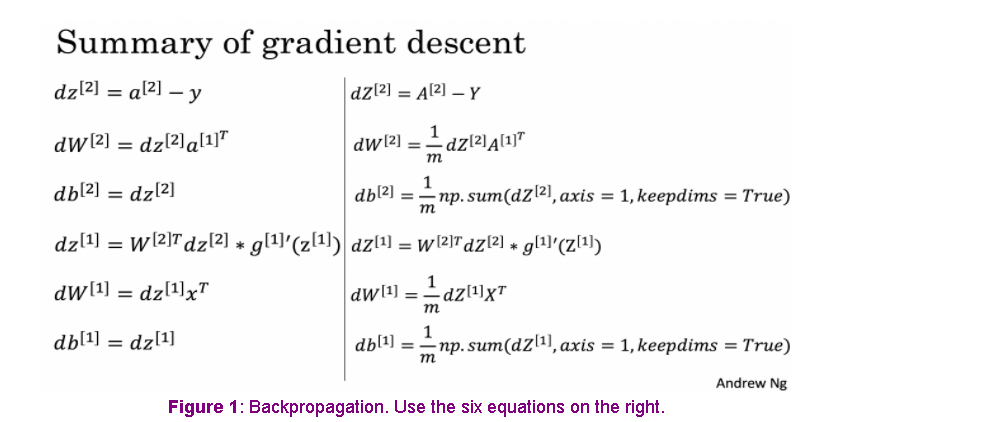

In [19]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,keepdims = True,axis = 1) 
    dZ1 = np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
    dW1 = (1 / m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis =1, keepdims = True)
    

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [111]:
def update_parameters(parameters, grads, learning_rate = 0.005):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    
    W1 = W1 -learning_rate*dW1
    b1 = b1 -learning_rate*db1
    W2 = W2 -learning_rate*dW2
    b2 = b2 -learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [113]:
def nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost=False):
    
    n_x = layer_sizes(X, Y,n_h)[0]
    n_y = layer_sizes(X, Y, n_h)[2]
    
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    

    for i in range(0, num_iterations):
       
        A2,cache = forward_propagation(X, parameters) 
        cost = compute_cost(A2,Y)
        grads =  backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 0.05)
        
   
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [114]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2>0.5,1,0)
    
    return predictions

Cost after iteration 0: 0.693143
Cost after iteration 1000: 0.649217
Cost after iteration 2000: 0.439895
Cost after iteration 3000: 0.360871
Cost after iteration 4000: 0.337999
Cost after iteration 5000: 0.326135
Cost after iteration 6000: 0.318413
Cost after iteration 7000: 0.312796
Cost after iteration 8000: 0.308457
Cost after iteration 9000: 0.304944


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

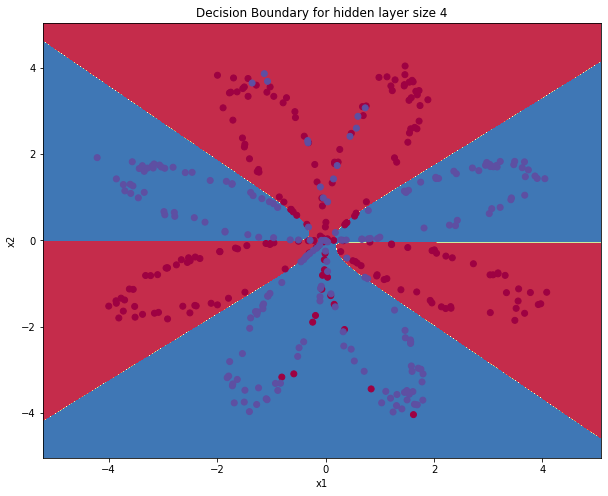

In [124]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [125]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 87%


# L-Layer model

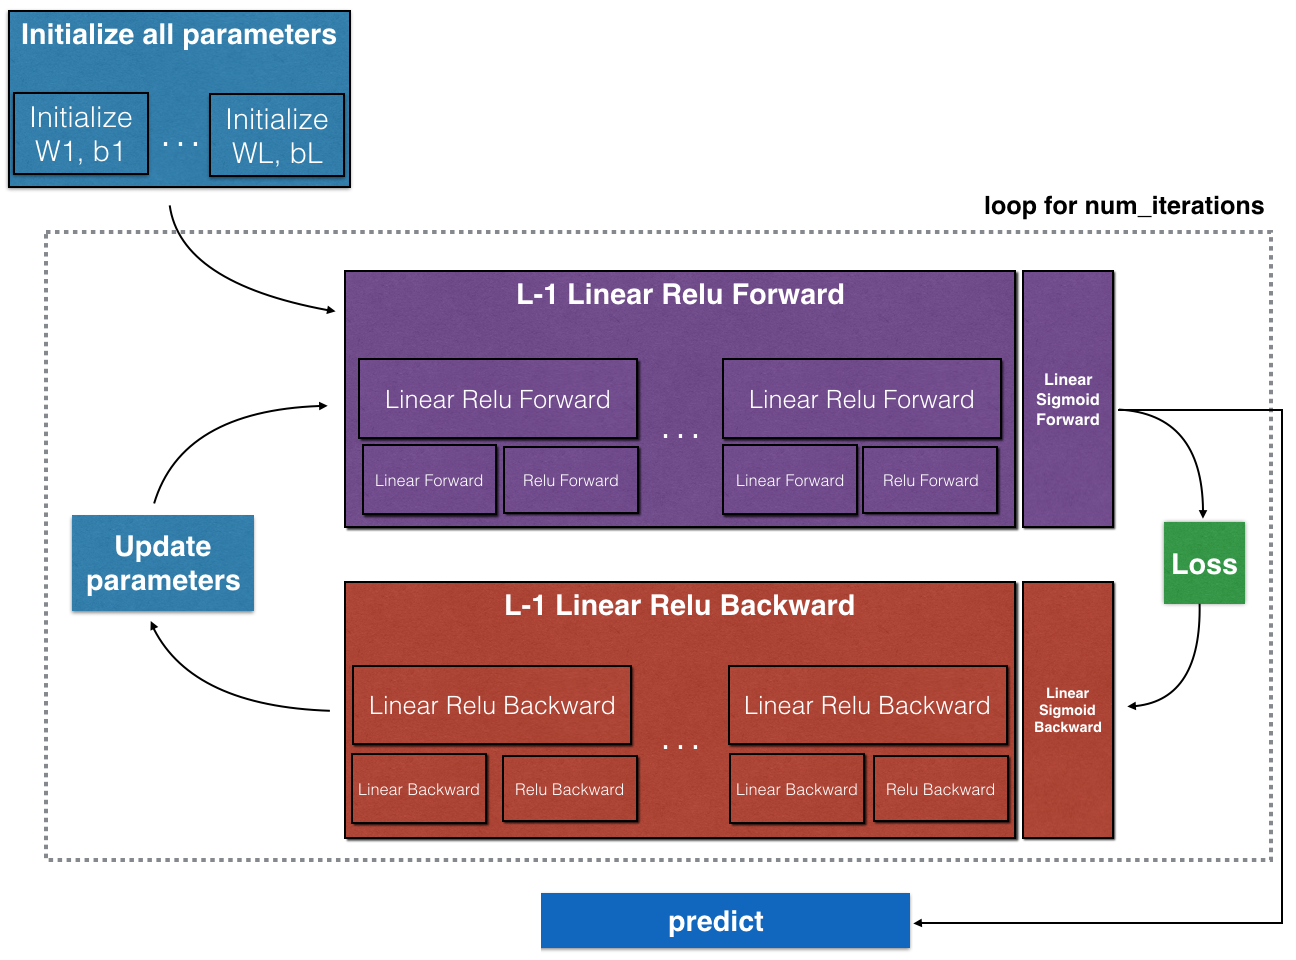

In [126]:


def initialize_parameters(n_x, n_h, n_y):

    
    np.random.seed(1)
    

    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

<a name='3-2'></a>


<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W</b> </td> 
        <td> <b>Shape of b</b>  </td> 
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
   <tr>
       <td> <b>Layer L</b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Remember that when you compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22} 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22} 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{3}  $$


In [127]:

def initialize_parameters_deep(layer_dims):

    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 

    for l in range(1, L):
  

        parameters['W'+str(l)] =  np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        
        
    return parameters

In [128]:

def linear_forward(A, W, b):

    Z = np.dot(W,A) + b
    
    cache = (A, W, b)
    
    return Z, cache

In [129]:
def linear_activation_forward(A_prev, W, b, activation):
 

    if activation == "sigmoid":
      
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
      
    elif activation == "relu":
   
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
       
    cache = (linear_cache, activation_cache)

    return A, cache

In [130]:

def L_model_forward(X, parameters):


    caches = []
    A = X
    L = len(parameters) // 2                
    
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = 'relu')
        caches.append(cache)


    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)],activation = 'sigmoid')
    caches.append(cache)
    
          
    return AL, caches

In [131]:

def compute_cost(AL, Y):

    
    m = Y.shape[1]

    cost = -1/m*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    
   
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

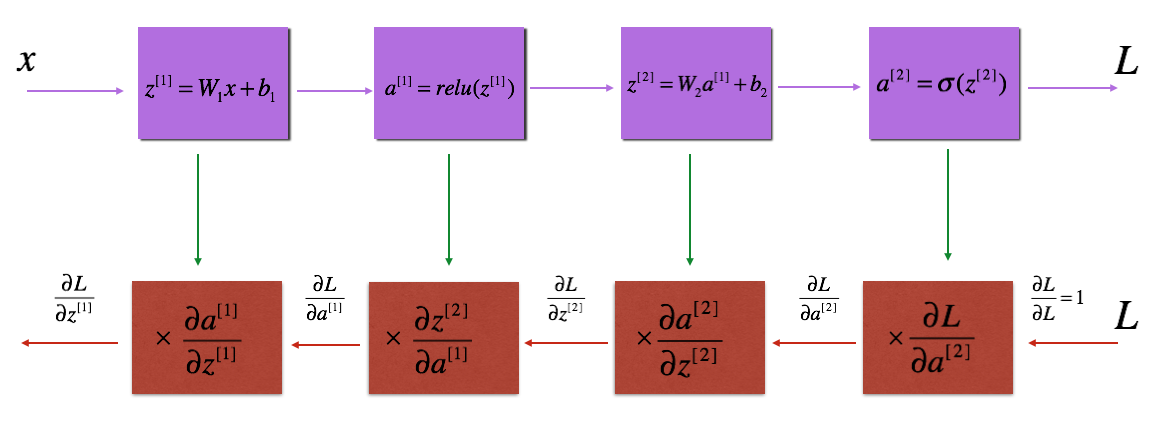


The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


 

In [132]:


def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis =1 , keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    
    return dA_prev, dW, db

In [133]:

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
        
    elif activation == "sigmoid":

        
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
       
    
    return dA_prev, dW, db

In [134]:

def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
   

    current_cache = caches[-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = 'sigmoid')
    grads["dA" + str(L-1)] =  dA_prev_temp
    grads["dW" + str(L)]   = dW_temp
    grads["db" + str(L)] = db_temp
    
    
 
    for l in reversed(range(L-1)):
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA'+str(l+1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] =  dA_prev_temp
        grads["dW" + str(l+1)]   = dW_temp
        grads["db" + str(l+1)] = db_temp

    return grads

In [136]:

def update_parameters(params, grads, learning_rate):

    parameters = params.copy()
    L = len(parameters) // 2 
    
    for l in range(L):
     
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] -learning_rate* grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -learning_rate* grads["db" + str(l+1)]
 
    return parameters

In [137]:


def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
  
    
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
   


    parameters = initialize_parameters(n_x, n_h, n_y) 
    

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    


    for i in range(0, num_iterations):

      
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = 'sigmoid')
        
       
        cost = compute_cost(A2, Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
 
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = 'relu')
       
    
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
       
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
       
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [ ]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

In [ ]:
predictions_test = predict(test_x, test_y, parameters)

In [ ]:
 CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [140]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                        
    
   
    parameters = initialize_parameters_deep(layers_dims)
    
    
    for i in range(0, num_iterations):

      
        AL, caches = L_model_forward(X, parameters)
        
       
        cost = compute_cost(AL, Y)
        
     
        grads = L_model_backward(AL, Y, caches)
        
   
        parameters = update_parameters(parameters, grads, learning_rate)
        
    
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

In [ ]:
pred_test = predict(test_x, test_y, parameters)